# 重み減衰(Weight Decay)の実験
* ネットワークの重み W,b を減衰させるために、目的関数を E(W,b)+R(W,b) とし、この値が小さくなるように W と b の学習を行います
  * E : ネットワークの予測値と教師値の差 (error)
  * R : 正則化項。 R ∝ W,b
* 正則化項には次の 4 タイプがあります
  * 正則化しない　R(W,b) = 0
  * L1正則化 ： W,b を一律に 0　方向に近づける
  * L2正則化 ： W,b をその絶対値に応じた割合で 0 方向に近づける
  * L∞正則化 : W(l), b(l) のうち、絶対値が最大の要素を 0 方向に近づける
* このノートは、それぞれの正則化の振る舞いを実験したものです

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

import sys,os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from ai_chan import nnet
from ai_chan import layer
from ai_chan import util
from ai_chan import grad
from ai_chan import weight
from ai_chan import train

In [2]:
# データセットのロード
# iris.data = [(がく片の長さ , がく片の幅 , 花びらの長さ , 花びらの幅)]
iris = datasets.load_iris()
# データをシャッフルする (ミソ!)
np.random.shuffle(iris.data)
x_vals = np.array([x[0:3] for x in iris.data])
d_vals = np.array([x[3] for x in iris.data])

In [3]:
def train_and_show_chart(net):
    """
    重み減衰(Weight decay)アルゴリズムの選択以外のところを関数化
    """
    trainer = train.NetTrainer(net, x_vals.T, d_vals.T)
    err = trainer.train(20000)
    
    print("残差 {}".format(err))

    # 学習結果自体の表示
    d_train, y_train, d_eval, y_eval = trainer.eval()

    plt.figure()
    plt.title("学習後の予測値")
    plt.xlabel("教師値")
    plt.ylabel("予測値")
    plt.xlim(0.0, max(4.0, np.max(d_train), np.max(d_eval)))
    plt.ylim(0.0, max(4.0, np.max(y_train), np.max(y_eval)))

    for dataset in range(0, len(d_train)):
        plt.scatter(d_train[dataset].T, y_train[dataset].T, marker="s", label="訓練データ {}".format(dataset+1))

    plt.scatter(d_eval.T, y_eval.T, marker="s", label="評価データ")

    x = np.arange(-10,10,0.1)
    plt.plot(x, x, color="gray")
    plt.legend()
    plt.show() 
    
     # W のヒストグラム
    plt.figure()
    plt.title("学習回数別 重みの頻度(Weight)")
    plt.xlabel("重み")
    plt.ylabel("頻度")
    plt.step(trainer.edge_w_start[:-1], trainer.hist_w_start, where='post', color="cyan", label="初期状態")
    plt.step(trainer.edge_w_finish[:-1], trainer.hist_w_finish, where='post', color="blue", label="学習後")
    plt.legend()
    plt.show()
    
    # b のヒストグラム
    plt.figure()
    plt.title("学習回数別 バイアスの頻度(Bias)")
    plt.xlabel("重み")
    plt.ylabel("頻度")
    plt.step(trainer.edge_b_start[:-1], trainer.hist_b_start, where='post', color="pink", label="初期状態")
    plt.step(trainer.edge_b_finish[:-1], trainer.hist_b_finish, where='post', color="red", label="学習後")
    plt.legend()
    plt.show()

# 正則化しない場合
* W　と　b　を小さくするような学習は行いません

残差 0.12567385442439052


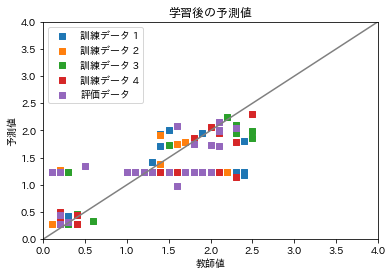

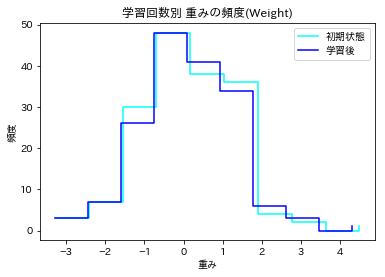

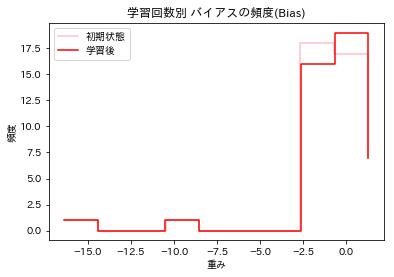

In [8]:
net = nnet.SimpleNet()

# 入力データを(初期状態で)標準化スコアに変換する前処理層
net.add_pre_layer(layer.Normalize(), x=x_vals.T, y=d_vals.T)

# 中間層は 3,40
net.add_mid_layer(3, 40)

# 出力層は1つの値を出力
net.add_out_layer(1)

# 学習係数は 0.001固定 (呼び出し回数で減衰させるとうまく収束しない)
# net.set_learning_rate(grad.Shrink(rate=0.01))

# 正則化（重み減衰)
# net.set_weight_decay(weight.L1Decay())
# net.set_weight_decay(weight.L2Decay())
# net.set_weight_decay(weight.LmaxDecay())

train_and_show_chart(net)

# L=1 正規化
* W　と　b　を一律に同じだけ　０ に近づけるような学習を行います

残差 0.012585439233923138


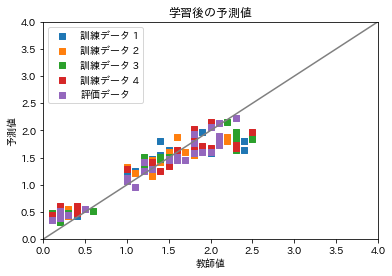

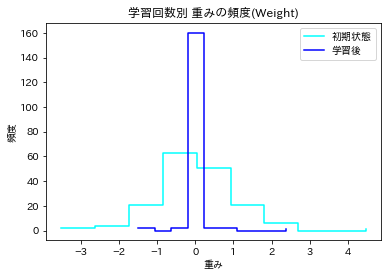

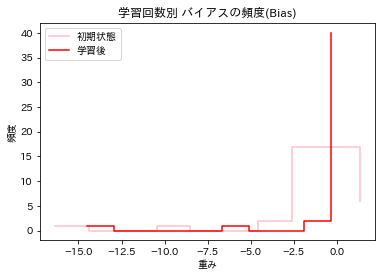

In [5]:
net = nnet.SimpleNet()

# 入力データを(初期状態で)標準化スコアに変換する前処理層
net.add_pre_layer(layer.Normalize(), x=x_vals.T, y=d_vals.T)

# 中間層は 3,40
net.add_mid_layer(3, 40)

# 出力層は1つの値を出力
net.add_out_layer(1)

# 学習係数は 0.001固定 (呼び出し回数で減衰させるとうまく収束しない)
# net.set_learning_rate(grad.Shrink(rate=0.01))

# 正則化（重み減衰)
net.set_weight_decay(weight.L1Decay())
# net.set_weight_decay(weight.L2Decay())
# net.set_weight_decay(weight.LmaxDecay())

train_and_show_chart(net)

# L=2 正規化
* W　と　b　をその絶対値に応じて 0 に近づけるような学習を行います。値が0から遠い重みパラメータほど、より大きく 0に近づくように学習される。

残差 0.012027022867455356


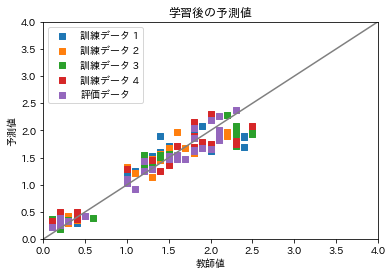

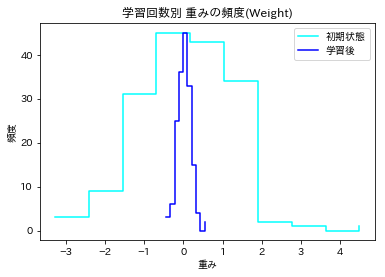

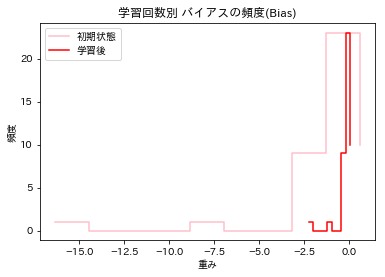

In [6]:
net = nnet.SimpleNet()

# 入力データを(初期状態で)標準化スコアに変換する前処理層
net.add_pre_layer(layer.Normalize(), x=x_vals.T, y=d_vals.T)

# 中間層は 3,40
net.add_mid_layer(3, 40)

# 出力層は1つの値を出力
net.add_out_layer(1)

# 学習係数は 0.001固定 (呼び出し回数で減衰させるとうまく収束しない)
# net.set_learning_rate(grad.Shrink(rate=0.01))

# 正則化（重み減衰)
# net.set_weight_decay(weight.L1Decay())
net.set_weight_decay(weight.L2Decay())
# net.set_weight_decay(weight.LmaxDecay())

train_and_show_chart(net)

# L=∞ 正規化
* W(l) と b(l) のうち、それぞれ最も0より遠い重みパラメータのみ0に近づくように学習される。

残差 0.05382352668273079


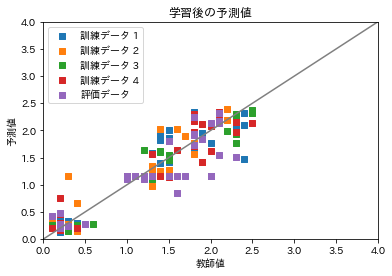

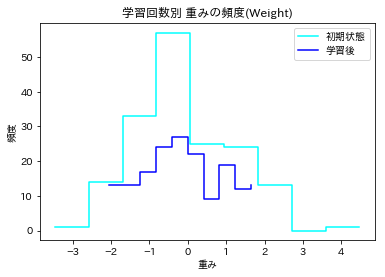

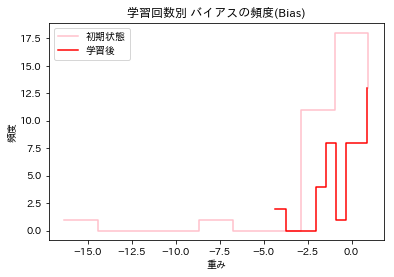

In [7]:
net = nnet.SimpleNet()

# 入力データを(初期状態で)標準化スコアに変換する前処理層
net.add_pre_layer(layer.Normalize(), x=x_vals.T, y=d_vals.T)

# 中間層は 3,40
net.add_mid_layer(3, 40)

# 出力層は1つの値を出力
net.add_out_layer(1)

# 学習係数は 0.001固定 (呼び出し回数で減衰させるとうまく収束しない)
# net.set_learning_rate(grad.Shrink(rate=0.01))

# 正則化（重み減衰)
# net.set_weight_decay(weight.L1Decay())
# net.set_weight_decay(weight.L2Decay())
net.set_weight_decay(weight.LmaxDecay())

train_and_show_chart(net)